# Programming for Data Analysis

## Project 2

### Problem statement

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.


### Example project idea
As a lecturer I might pick the real-world phenomenon of the performance of students
studying a ten-credit module. After some research, I decide that the most interesting
variable related to this is the mark a student receives in the module - this is going to be
one of my variables (grade).

Upon investigation of the problem, I find that the number of hours on average a
student studies per week (hours), the number of times they log onto Moodle in the
first three weeks of term (logins), and their previous level of degree qualification (qual)
are closely related to grade. The hours and grade variables will be non-negative real
number with two decimal places, logins will be a non-zero integer and qual will be a
categorical variable with four possible values: none, bachelors, masters, or phd.

After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that
a normal distribution is an acceptable model of such a variable. Likewise, I investigate
the other four variables, and I also look at the relationships between the variables. I
devise an algorithm (or method) to generate such a data set, simulating values of the
four variables for two-hundred students. I detail all this work in my notebook, and then
I add some code in to generate a data set with those properties.


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
# Importing the tips dataset from the local file
df = pd.read_csv("diamonds_V2.csv")
df.head()

,price,carat,total_depth_%,table,length,width,depth,cut,color,clarity,color_mod,clarity_mod
0,326,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,2,7
1,326,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1,2,6
2,327,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1,2,4
3,334,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2,6,5
4,335,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2,7,7


In [24]:
df['price'].describe()

count    48704.000000
mean      2891.867691
std       2399.560986
min        326.000000
25%        892.000000
50%       2025.000000
75%       4405.000000
max       9999.000000
Name: price, dtype: float64

Here's a quick breakdown of the above as it relates to this particular dataset:

count: there are 244 rows in the dataset.
mean: the average bill.
std: the standard deviation. Standard Deviation tells how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. In our case the measurememnts of a total bill are spread of 8.9 to the left and to the right from the average bill (mean).
min: the smallest bill in the dataset = 3.07 USD
25%: the 25th percentile. 25% of all bills are lower than 13.35 USD.
50%: the 50th percentile, or the median. 50% of bills are lower than 13.80 USD.
75%: the 75th percentile. 75% of bills are lower than 24.13 USD.
max: the highest bill = 50.81 USD.

Also we can visually represent the distribution of the total bills using a histogram.

Histogram shows frequency distribution for a particular column in a dataset. For instance, if we want to see how many times the amount of total_bill is between 10-20, 20-30, 30-40 and so on, we can use a histogram.

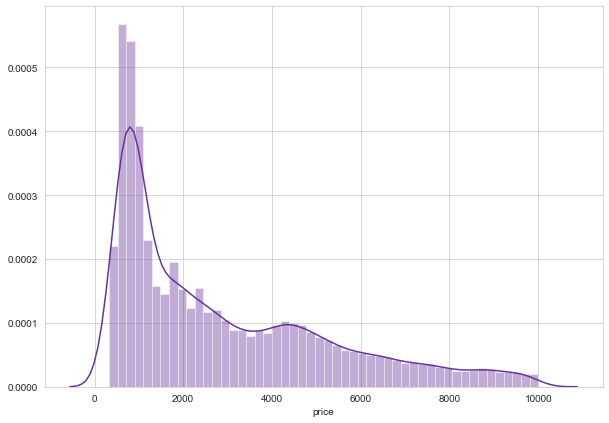

In [25]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(df['price'], color="rebeccapurple")

In [26]:
df['carat'].describe()

count    48704.000000
mean         0.696745
std          0.357456
min          0.200000
25%          0.380000
50%          0.600000
75%          1.010000
max          3.110000
Name: carat, dtype: float64

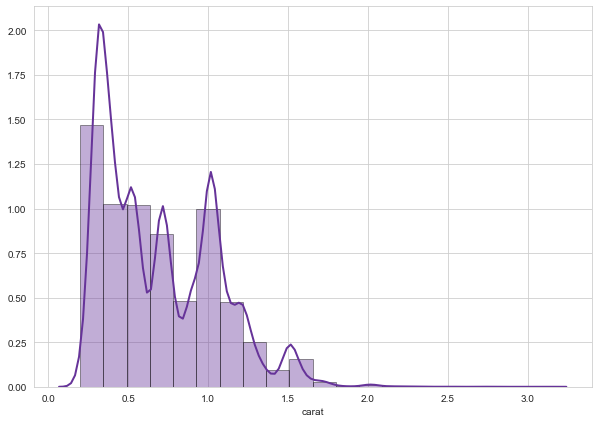

In [105]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['carat'], color="rebeccapurple", bins = 20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [86]:
df['depth'].describe()

count    48703.000000
mean         3.412032
std          0.590573
min          1.070000
25%          2.860000
50%          3.350000
75%          3.950000
max          5.980000
Name: depth, dtype: float64

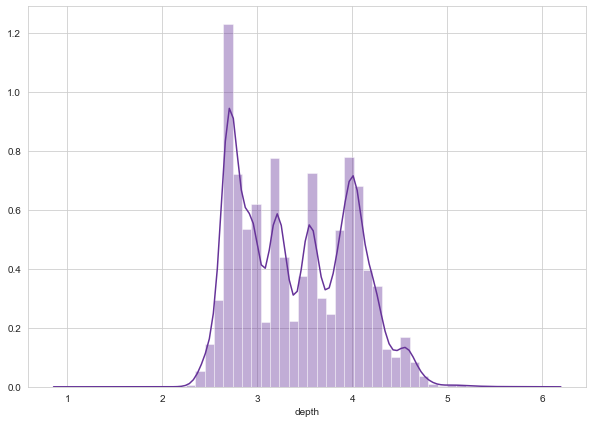

In [87]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['depth'], color="rebeccapurple")

In [88]:
df['length'].describe()

count    48703.000000
mean         5.523544
std          0.951846
min          3.730000
25%          4.640000
50%          5.430000
75%          6.380000
max          9.240000
Name: length, dtype: float64

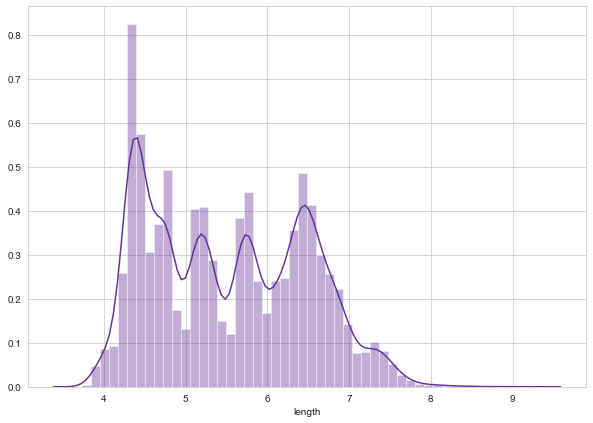

In [90]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['length'], color="rebeccapurple")

In [91]:
df['width'].describe()

count    48703.000000
mean         5.526410
std          0.944412
min          3.680000
25%          4.655000
50%          5.440000
75%          6.370000
max          9.130000
Name: width, dtype: float64

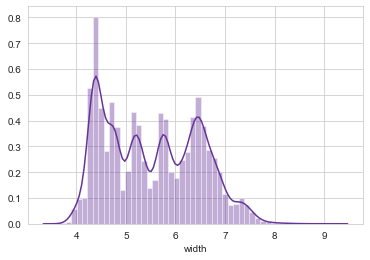

In [92]:
sns.set_style("whitegrid")
sns.distplot(df['width'], color="rebeccapurple")

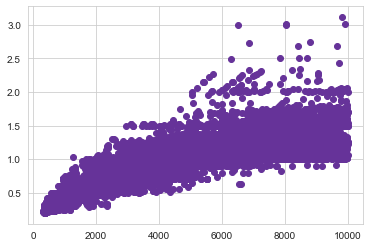

In [94]:
plt.scatter(df['price'], df['carat'], color="rebeccapurple")

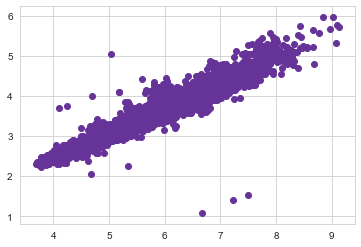

In [93]:
plt.scatter(df['width'], df['depth'], color="rebeccapurple")

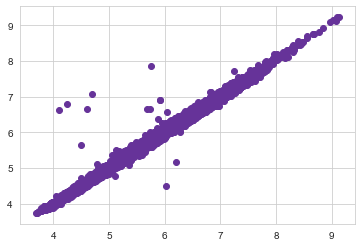

In [44]:
plt.scatter(df['width'], df['length'], color="rebeccapurple")

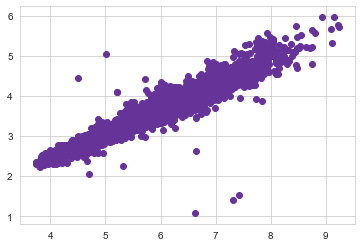

In [46]:
#plt.axis([0, 6, 0, 20])
plt.scatter(df['length'], df['depth'], color="rebeccapurple")

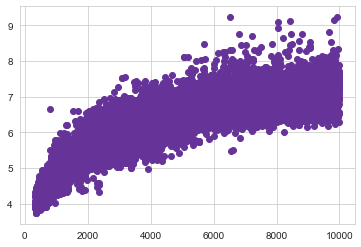

In [95]:
plt.scatter(df['price'], df['length'], color="rebeccapurple")

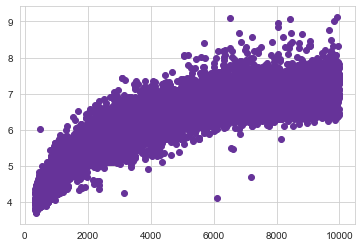

In [96]:
plt.scatter(df['price'], df['width'], color="rebeccapurple")

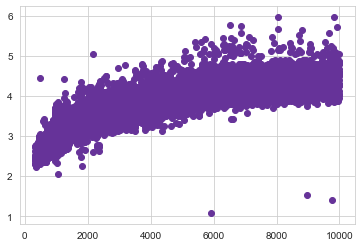

In [97]:
plt.scatter(df['price'], df['depth'], color="rebeccapurple")

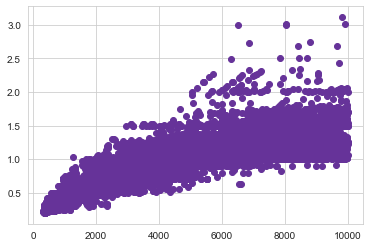

In [98]:
plt.scatter(df['price'], df['carat'], color="rebeccapurple")

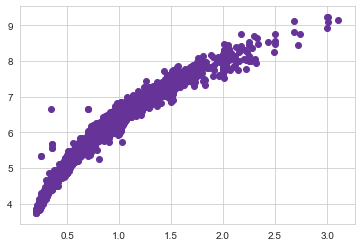

In [99]:
plt.scatter(df['carat'], df['length'], color="rebeccapurple")

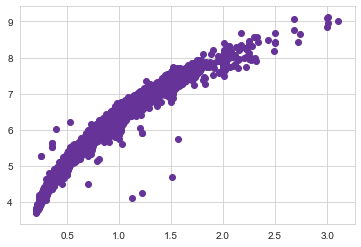

In [100]:
plt.scatter(df['carat'], df['width'], color="rebeccapurple")

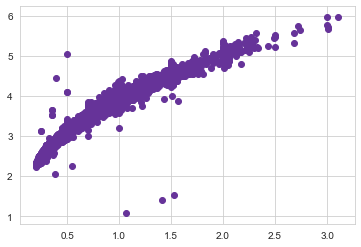

In [101]:
plt.scatter(df['carat'], df['depth'], color="rebeccapurple")

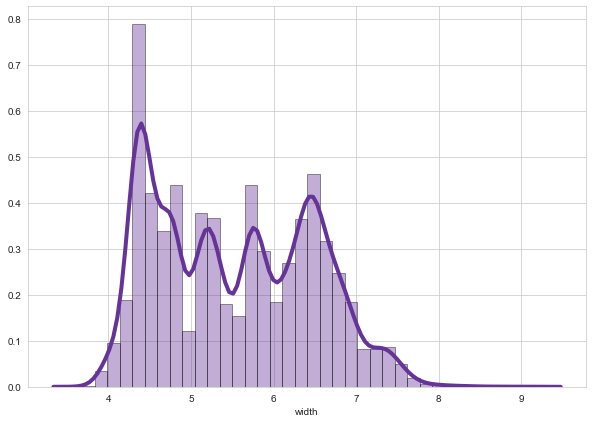

In [81]:
#set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['width'], color="rebeccapurple", bins = int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

(array([1.700e+01, 2.460e+02, 6.980e+02, 1.386e+03, 5.810e+03, 3.111e+03,
        2.497e+03, 3.235e+03, 8.900e+02, 2.784e+03, 2.710e+03, 1.332e+03,
        1.131e+03, 3.234e+03, 2.174e+03, 1.353e+03, 1.980e+03, 2.697e+03,
        3.417e+03, 2.339e+03, 1.818e+03, 1.363e+03, 6.010e+02, 6.090e+02,
        6.400e+02, 3.620e+02, 1.350e+02, 4.800e+01, 3.500e+01, 2.000e+01,
        1.100e+01, 8.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 4.000e+00]),
 array([3.68      , 3.83138889, 3.98277778, 4.13416667, 4.28555556,
        4.43694444, 4.58833333, 4.73972222, 4.89111111, 5.0425    ,
        5.19388889, 5.34527778, 5.49666667, 5.64805556, 5.79944444,
        5.95083333, 6.10222222, 6.25361111, 6.405     , 6.55638889,
        6.70777778, 6.85916667, 7.01055556, 7.16194444, 7.31333333,
        7.46472222, 7.61611111, 7.7675    , 7.91888889, 8.07027778,
        8.22166667, 8.37305556, 8.52444444, 8.67583333, 8.82722222,
        8.97861111, 9.13      ]),
 <a list of 36 Patch objects>)

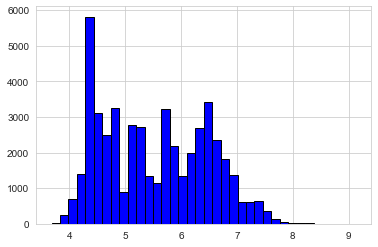

In [76]:
plt.hist(df['width'], color = 'blue', edgecolor = 'black', bins = int(180/5))

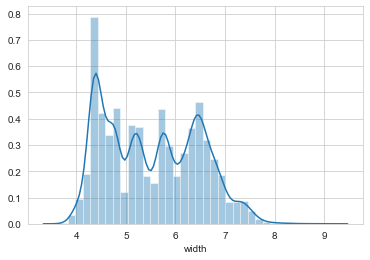

In [78]:
sns.distplot(df['width'], bins = int(180/5))

# Testing cases

In [4]:
from scipy.stats import expon
from scipy.stats import poisson

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

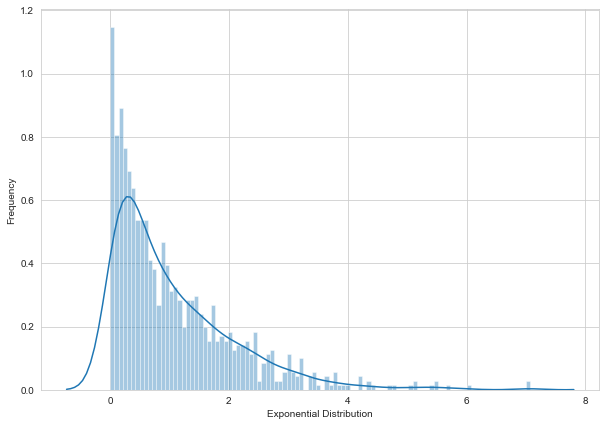

In [59]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)

fig = plt.figure(figsize=(10,7))
ax = sns.distplot(data_expon, bins=100)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

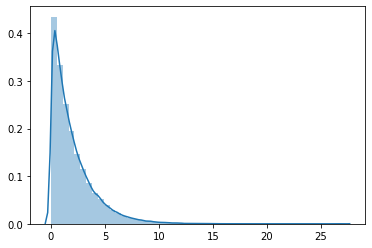

In [5]:
g_shape, g_scale, g_size = 1, 2, 100000
gamma = np.random.gamma(g_shape, g_scale, g_size)
sns.distplot(gamma)